# Sri Lank Flood Risk Impact Analysis

In [1]:
# import modules
import arcpy
import arcgis
from arcgis import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import IPython.display as display
import warnings
warnings.filterwarnings("ignore")

In [2]:
# setup directory and working env
gis = arcgis.GIS()
arcpy.env.workspace = r"C:\Users\wb450887\OneDrive - WBG\Documents\ArcGIS\Projects\Sri Lanka\Shape Files\admin"

arcpy.env.addOutputsToMap = True
arcpy.env.overwriteOutput = True
aprx = arcpy.mp.ArcGISProject("CURRENT")
map = aprx.listMaps("Map")[0]

## Impact Analysis: Population exposure

### District level flood risk population exposure

In [3]:
# Population exposured to different flood risk level
pop_df = pd.read_csv(r'C:\Users\wb450887\OneDrive - WBG\Documents\ArcGIS\Projects\Sri Lanka\Tank\FloodPop_LKA_asc.csv')
pop_df['Population Density 2020'] = pop_df['pop2020']/pop_df['Area']
pop_df.head()

,FID,ADM2_EN,ADM3_EN,Shape_Leng,Shape_Area,Area,pop2020,pop_low,pop_mod,pop_high,pop_vhigh,pop_risk,pop_hvhigh,pct_low,pct_mod,pct_high,pct_vhigh,pct_risk,pvt_hvhigh,pct_norisk,pct_hverisk,Population Density 2020
0,0,Jaffna,[unknown],0.717203,0.000979,12,15053,1608,1497,296,0,1793,296,10.682256,9.944861,1.966385,0.000000,11.911247,1.966385,77.406497,22.593503,1254.416667
1,1,Ampara,Addalaichenai,0.504240,0.006047,74,49255,12219,10870,1747,14,12631,1761,24.807634,22.068825,3.546848,0.028424,25.644097,3.575272,49.548269,50.451731,665.608108
2,2,Kalutara,Agalawatta,0.636129,0.007542,92,42124,2021,2021,2068,1187,5276,3255,4.797740,4.797740,4.909315,2.817871,12.524926,7.727186,82.677334,17.322666,457.869565
3,3,Ampara,Akkaraipattu,0.554562,0.004344,53,38928,6043,4745,4159,19,8923,4178,15.523531,12.189170,10.683827,0.048808,22.921804,10.732635,61.554665,38.445335,734.490566
4,4,Galle,Akmeemana,0.622386,0.005813,71,98835,8124,6367,5862,1943,14172,7805,8.219760,6.442050,5.931097,1.965903,14.339050,7.897000,77.441190,22.558810,1392.042254


In [4]:
# Grouping risk level
dist_pop_df = pop_df.groupby('ADM2_EN', as_index=False)[['Area','pop2020','pop_low','pop_mod','pop_high','pop_vhigh', 'pop_risk', 'pop_hvhigh']].sum()
dist_pop_df['pct_risk'] = dist_pop_df['pop_risk']/dist_pop_df['pop2020']*100
dist_pop_df['pct_hvhigh'] = dist_pop_df['pop_hvhigh']/dist_pop_df['pop2020']*100
dist_pop_df['pct_haverisk'] = (dist_pop_df['pop_low'] + dist_pop_df['pop_mod'] + dist_pop_df['pop_high'] + dist_pop_df['pop_vhigh'])/dist_pop_df['pop2020']*100
dist_pop_df['Population Density 2020'] = dist_pop_df['pop2020']/dist_pop_df['Area']
dist_pop_df.head()

,ADM2_EN,Area,pop2020,pop_low,pop_mod,pop_high,pop_vhigh,pop_risk,pop_hvhigh,pct_risk,pct_hvhigh,pct_haverisk,Population Density 2020
0,Ampara,4327,672992,56338,23082,27797,2774,53653,30571,7.972309,4.542550,16.343582,155.533164
1,Anuradhapura,7128,918654,56692,2929,16294,3355,22578,19649,2.457726,2.138890,8.628929,128.879630
2,Badulla,2638,743002,27270,5124,14254,17700,37078,31954,4.990296,4.300661,8.660542,281.653525
3,Batticaloa,2434,514709,53103,8217,11037,1684,20938,12721,4.067930,2.471494,14.385021,211.466311
4,Colombo,676,2518332,271756,28215,209821,293017,531053,502838,21.087490,19.967105,31.878601,3725.343195


In [5]:
# Visual Python: Visualization > Seaborn
import numpy as np
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'
    
    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'
                
        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center') 
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

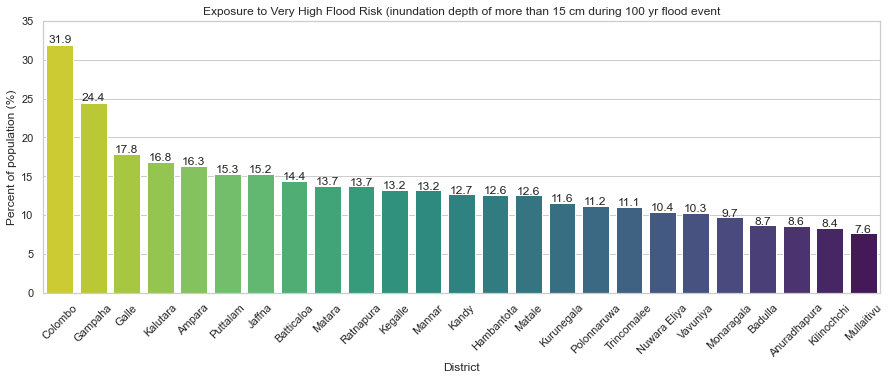

In [6]:
# Population exposure to high flood risk (moderate + high + very high) defined by Rentschler, Salhab, & Jafino (2022), available here: https://www.nature.com/articles/ s41467 022 30727 4
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid')
ax = sns.barplot(data=dist_pop_df, x='ADM2_EN', y='pct_haverisk', ci=None, palette="OrRd_r",
                 order=dist_pop_df.groupby('ADM2_EN')['pct_haverisk'].mean().sort_values(ascending=False).index)
vp_seaborn_show_values(ax)
plt.ylim((0, 35))
plt.xticks(rotation=45)
plt.title('Exposure to Very High Flood Risk (inundation depth of more than 15 cm during 100 yr flood event')
plt.xlabel('District')
plt.ylabel('Percent of population (%)')
plt.show()

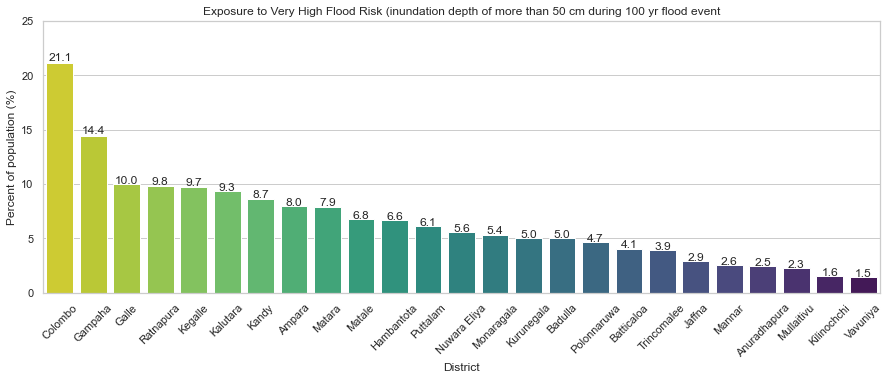

In [7]:
# Population exposure to very high flood risk (high + very high) > 50 cm
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid')
ax = sns.barplot(data=dist_pop_df, x='ADM2_EN', y='pct_risk', ci=None, palette="OrRd_r",
                 order=dist_pop_df.groupby('ADM2_EN')['pct_risk'].mean().sort_values(ascending=False).index)
vp_seaborn_show_values(ax)
plt.ylim((0, 25))
plt.xticks(rotation=45)
plt.title('Exposure to Very High Flood Risk (inundation depth of more than 50 cm during 100 yr flood event')
plt.xlabel('District')
plt.ylabel('Percent of population (%)')
plt.show()

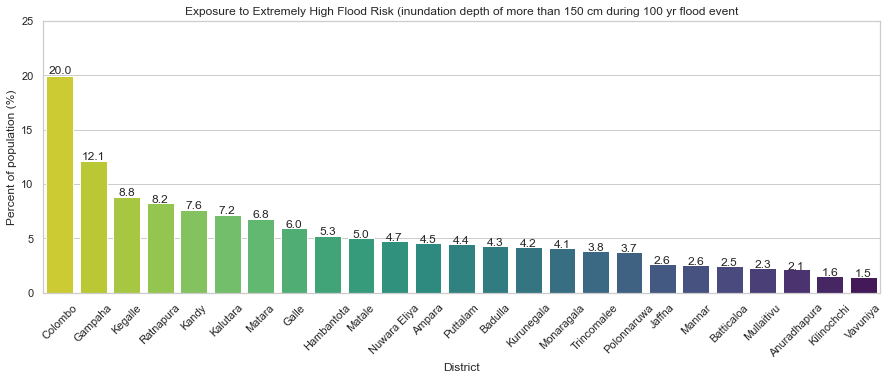

In [8]:
# Population exposure to extrenetly high flood risk (very high) > 150 cm
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid')
ax = sns.barplot(data=dist_pop_df, x='ADM2_EN', y='pct_hvhigh', ci=None, palette="OrRd_r",
                 order=dist_pop_df.groupby('ADM2_EN')['pct_hvhigh'].mean().sort_values(ascending=False).index)
vp_seaborn_show_values(ax)
plt.ylim((0, 25))
plt.xticks(rotation=45)
plt.title('Exposure to Extremely High Flood Risk (inundation depth of more than 150 cm during 100 yr flood event')
plt.xlabel('District')
plt.ylabel('Percent of population (%)')
plt.show()

### DSD (ASC) level flood risk polulation exposure

In [9]:
# add DSD/ASC flood data
map.addDataFromPath(r'C:\Users\wb450887\OneDrive - WBG\Documents\ArcGIS\Projects\Sri Lanka\Tank\FloodPop_LKA_asc.csv')


#### High risk (> 15 cm inundation depth)

In [10]:
# Administrative level 3 shapefile
arcpy.MakeFeatureLayer_management("lka_admbnda_adm3_slsd_20200305.shp", "high_risk_lyr")
# Join admin level 2 shapefile with HIES data
arcpy.AddJoin_management( "high_risk_lyr", "ADM3_EN", "FloodPop_LKA_asc.csv", "ADM3_EN")
# map
p = arcpy.mp.ArcGISProject("CURRENT")
m = p.listMaps("Map")[0]
lyr = m.listLayers()[0]
sym = lyr.symbology

sym.updateRenderer("GraduatedColorsRenderer")
sym.renderer.colorRamp=p.listColorRamps("Viridis")[0]

s1 = 5
s2 = 10
s3 = 15
s4 = 20
s5 = 40
l1 = '<= ' + str(s1)
l2 = str(s1+1) + ' - ' + str(s2)
l3 = str(s2+1) + ' - ' + str(s3)
l4 = str(s3+1) + ' - ' + str(s4)
l5 = str(s4+1) + ' - ' + str(s5)
classBreakValues = [s1, s2, s3, s4, s5]
classBreakLabels = [l1, l2, l3, l4, l5]
sym.renderer.classificationField = "pct_hverisk"
sym.renderer.breakCount = len(classBreakValues)
count = 0

for brk in sym.renderer.classBreaks:
    brk.upperBound = classBreakValues[count]
    brk.label = classBreakLabels[count]
    count += 1
lyr.symbology = sym

#### Very high risk (> 50 cm inundation depth)

In [11]:
# Administrative level 3 shapefile
arcpy.MakeFeatureLayer_management("lka_admbnda_adm3_slsd_20200305.shp", "veryhigh_risk_lyr")
# Join admin level 2 shapefile with HIES data
arcpy.AddJoin_management( "veryhigh_risk_lyr", "ADM3_EN", "FloodPop_LKA_asc.csv", "ADM3_EN")
# chorograph map
p = arcpy.mp.ArcGISProject("CURRENT")
m = p.listMaps("Map")[0]
lyr = m.listLayers()[0]
sym = lyr.symbology

sym.updateRenderer("GraduatedColorsRenderer")
sym.renderer.colorRamp=p.listColorRamps("Viridis")[0]

s1 = 2
s2 = 5
s3 = 10
s4 = 15
s5 = 25
l1 = '<= ' + str(s1)
l2 = str(s1+1) + ' - ' + str(s2)
l3 = str(s2+1) + ' - ' + str(s3)
l4 = str(s3+1) + ' - ' + str(s4)
l5 = str(s4+1) + ' - ' + str(s5)
classBreakValues = [s1, s2, s3, s4, s5]
classBreakLabels = [l1, l2, l3, l4, l5]
sym.renderer.classificationField = "pct_risk"
sym.renderer.breakCount = len(classBreakValues)
count = 0

for brk in sym.renderer.classBreaks:
    brk.upperBound = classBreakValues[count]
    brk.label = classBreakLabels[count]
    count += 1
lyr.symbology = sym

#### Extremely high risk (> 150 cm inundation depth)

In [22]:
# Administrative level 3 shapefile
arcpy.MakeFeatureLayer_management("lka_admbnda_adm3_slsd_20200305.shp", "extremehigh_risk_lyr")
# Join admin level 2 shapefile with HIES data
arcpy.AddJoin_management( "extremehigh_risk_lyr", "ADM3_EN", "FloodPop_LKA_asc.csv", "ADM3_EN")
# map
p = arcpy.mp.ArcGISProject("CURRENT")
m = p.listMaps("Map")[0]
lyr = m.listLayers()[0]
sym = lyr.symbology

sym.updateRenderer("GraduatedColorsRenderer")
sym.renderer.colorRamp=p.listColorRamps("Viridis")[0]

s1 = 2
s2 = 5
s3 = 8
s4 = 10
s5 = 20
l1 = '<= ' + str(s1)
l2 = str(s1+1) + ' - ' + str(s2)
l3 = str(s2+1) + ' - ' + str(s3)
l4 = str(s3+1) + ' - ' + str(s4)
l5 = str(s4+1) + ' - ' + str(s5)
classBreakValues = [s1, s2, s3, s4, s5]
classBreakLabels = [l1, l2, l3, l4, l5]
sym.renderer.classificationField = "pvt_hvhigh"
sym.renderer.breakCount = len(classBreakValues)
count = 0

for brk in sym.renderer.classBreaks:
    brk.upperBound = classBreakValues[count]
    brk.label = classBreakLabels[count]
    count += 1
lyr.symbology = sym

### Bivariate map: High flood risk vs. Drought

In [20]:
# import bivariate data
asc_biv_df = pd.read_csv(r'C:\Users\wb450887\OneDrive - WBG\Documents\ArcGIS\Projects\Sri Lanka\Tank\DroughtFloodPop_asc.csv')
asc_biv_df.head()
# add DSD/ASC flood data
map.addDataFromPath(r'C:\Users\wb450887\OneDrive - WBG\Documents\ArcGIS\Projects\Sri Lanka\Tank\DroughtFloodPop_asc.csv')

In [21]:
# Administrative level 3 shapefile
arcpy.MakeFeatureLayer_management("lka_admbnda_adm3_slsd_20200305.shp", "biv_high_risk_lyr")
# Join admin level 2 shapefile with HIES data
arcpy.AddJoin_management( "biv_high_risk_lyr", "ADM3_EN", "DroughtFloodPop_asc.csv", "ADM3_EN")


<Result 'biv_high_risk_lyr'>

In [19]:
p = arcpy.mp.ArcGISProject("CURRENT")
m = p.listMaps("Map")[0]
lyr = m.listLayers()[0]
sym = lyr.symbology

sym.updateRenderer('UniqueValueRenderer')
sym.renderer.fields = ['pct_risk', 'ADM3_EN']
#select a colour ramp 
colorRamp = p.listColorRamps("Cyan to Purple")[0]  
#set the colour ramp 
sym.renderer.colorRamp = colorRamp
for grp in sym.renderer.groups:
    for item in grp.items:
        value = item.values[0][0]

lyr.symbology = sym

RuntimeError: Invalid set of Fileds : ['pct_risk', 'ADM3_EN']

## Correlation analysis: poverty

### District level correlation analysis

In [61]:
dist_poverty_df = pd.read_csv(r'C:\Users\wb450887\OneDrive - WBG\Documents\ArcGIS\Projects\Sri Lanka\Tank\HIES_poverty_agri.csv')
dist_poverty_df.head()

,district,poverty2002,poverty2012,ADM2_EN,hh_agri,pop_agri
0,Ampara,-,5.4,Ampara,0.875211,0.741114
1,Anuradhapura,20,7.6,Anuradhapura,2.074188,2.008260
2,Badulla,37,12.3,Badulla,5.241058,4.347327
3,Batticaloa,-,19.4,Batticaloa,6.118894,5.255334
4,Colombo,6,1.4,Colombo,12.752350,11.469271


In [62]:
# Merge flood data with HIES poverty estimates (2002, 2012)
dist_df = pd.merge(dist_pop_df, dist_poverty_df, on=['ADM2_EN'], how='inner').reset_index(drop=True)
dist_df.head()

,ADM2_EN,Area,pop2020,pop_low,pop_mod,pop_high,pop_vhigh,pop_risk,pop_hvhigh,pct_risk,pct_hvhigh,pct_haverisk,Population Density 2020,district,poverty2002,poverty2012,hh_agri,pop_agri
0,Ampara,4327,672992,56338,23082,27797,2774,53653,30571,7.972309,4.542550,16.343582,155.533164,Ampara,-,5.4,0.875211,0.741114
1,Anuradhapura,7128,918654,56692,2929,16294,3355,22578,19649,2.457726,2.138890,8.628929,128.879630,Anuradhapura,20,7.6,2.074188,2.008260
2,Badulla,2638,743002,27270,5124,14254,17700,37078,31954,4.990296,4.300661,8.660542,281.653525,Badulla,37,12.3,5.241058,4.347327
3,Batticaloa,2434,514709,53103,8217,11037,1684,20938,12721,4.067930,2.471494,14.385021,211.466311,Batticaloa,-,19.4,6.118894,5.255334
4,Colombo,676,2518332,271756,28215,209821,293017,531053,502838,21.087490,19.967105,31.878601,3725.343195,Colombo,6,1.4,12.752350,11.469271


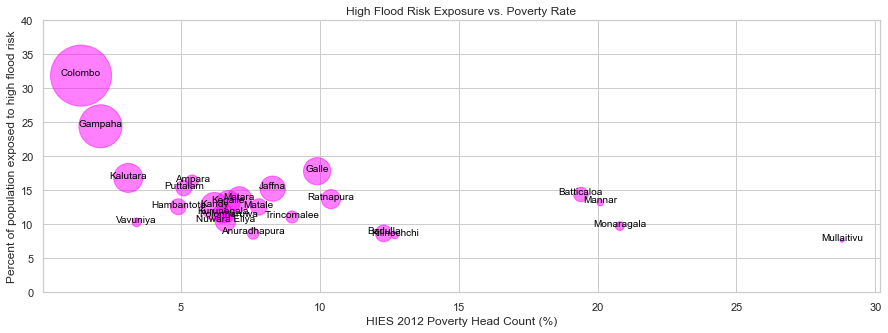

In [63]:
# scatterplot: high flood risk (<15cm) vs. poverty rate from HIES 2012
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid')
plt.scatter(dist_df['poverty2012'], dist_df['pct_haverisk'], s=dist_df['Population Density 2020'], c='magenta', alpha=0.5)
plt.ylim(0, 40)
plt.title('High Flood Risk Exposure vs. Poverty Rate')
plt.xlabel('HIES 2012 Poverty Head Count (%)')
plt.ylabel('Percent of population exposed to high flood risk')

df = pd.DataFrame({
'x': dist_df['poverty2012'],
'y': dist_df['pct_haverisk'],
'group': dist_df['ADM2_EN']
})

for line in range(0, df.shape[0]):
     plt.text(df.x[line], df.y[line], df.group[line], horizontalalignment='center', size='small', color='black')
        
plt.show()

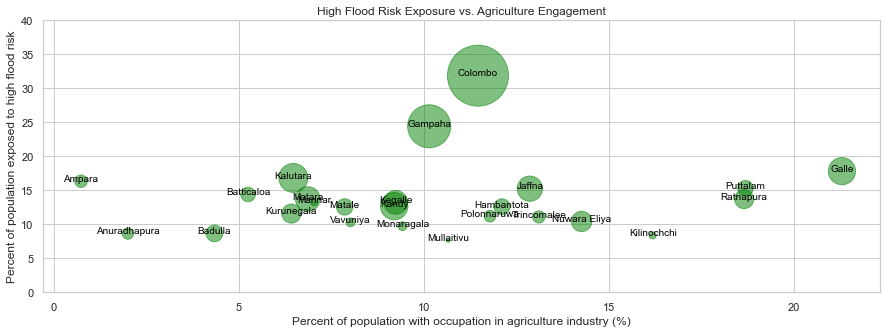

In [59]:
# scatterplot: high flood risk (>15 cm) vs. population with agriculture occupation from HIES 2016
plt.figure(figsize=(15, 5))
sns.set(style='whitegrid')
plt.scatter(dist_df['pop_agri'], dist_df['pct_haverisk'], s=dist_df['Population Density 2020'], c='green', alpha=0.5)
plt.ylim(0, 40)
plt.title('High Flood Risk Exposure vs. Agriculture Engagement')
plt.xlabel('Percent of population with occupation in agriculture industry (%)')
plt.ylabel('Percent of population exposed to high flood risk')

df = pd.DataFrame({
'x': dist_df['pop_agri'],
'y': dist_df['pct_haverisk'],
'group': dist_df['ADM2_EN']
})

for line in range(0, df.shape[0]):
     plt.text(df.x[line], df.y[line], df.group[line], horizontalalignment='center', size='small', color='black')
        
plt.show()

### DSD level correlation analysis